# CASE STUDY : FASHION CLASS CLASSIFICATION USING CNN

# OBJECTIVE 

In this case study we'll look at a hypothetical situation. We assume that if a retailer hired you to build a virtual stylist assistant that looks at customer Instagram and Facebook images and classifies what fashion category they are wearing either bags dresses and pants. The virtual assistant can help the retailer detect and forecast fashion trends and launch targeted marketing campaigns.

In this story we're going to use the fashionmnist data. It's a data set that contains images of bags shoes and dresses. And we're asking the deep network to classify the images into 10 classes.

So we wanted to build kind of an app per se or a model. They can look at images and can tell us exactly what category in this image.
Is it like a short. Is it a bag. Is it like a hat. And so on.

### PROBLEMS STATEMENT AND BUSINESS CASE

Download dataset from here 

https://www.kaggle.com/zalando-research/fashionmnist

Fashion training set consist of 70,000 images divided into 60,000 training and 10,000 testing samples. 
Dataset samples consits of 28x28 grayscale image associated with a label from 10 calsses

The top 10 callases as follows : <br>
    
0 -> T-shirts <br>
1 -> Trouser <br>
2 -> Pullover <br>
3 -> Dress <br>
4 -> Coat <br>
5 -> Sandel <br>
6 -> Shirt <br>
7 -> Sneaker <br>
8 -> Bag <br>
9 -> Ankle boot <br>



Each Image is 28 pixel in hight and 28 pixel in width, for a total of 784 pixels in total. Each pixel has a
single Pixel value associated with it, indicating the lightness or darkness of the pixel. Higher number 
means darker piexl. The pixel value is an integer Between 0 and 255

# IMPORT THE LIBRARIES 



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Supress warnings

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)

In [22]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')

In [23]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv',sep=',')

In [24]:
# VISUALIZATION OF THE DATASET

In [25]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Each observation is image. the orignal image is coverted into the each individual pixel so 28*28=784 pixel 

In [26]:
fashion_train_df.shape

(60000, 785)

In [27]:
fashion_test_df.shape

(10000, 785)

Create training and testing array so we can actually explore these arrays and view or visualize the data.

In [28]:
training = np.array(fashion_train_df, dtype='float32')

In [29]:
testing = np.array(fashion_test_df, dtype='float32')

# DATA VISUALIZATION

Visualize just one image in the form of 28 by 28 pixel

4.0


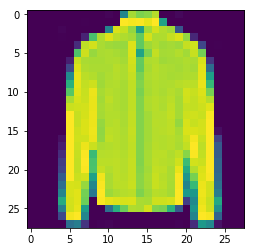

In [30]:
import random
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i, 0 ]
print(label)

The top 10 callases as follows : <br>
    
0 -> T-shirts <br>
1 -> Trouser <br>
2 -> Pullover <br>
3 -> Dress <br>
4 -> Coat <br>
5 -> Sandel <br>
6 -> Shirt <br>
7 -> Sneaker <br>
8 -> Bag <br>
9 -> Ankle boot <br>



# View more image in a grid format

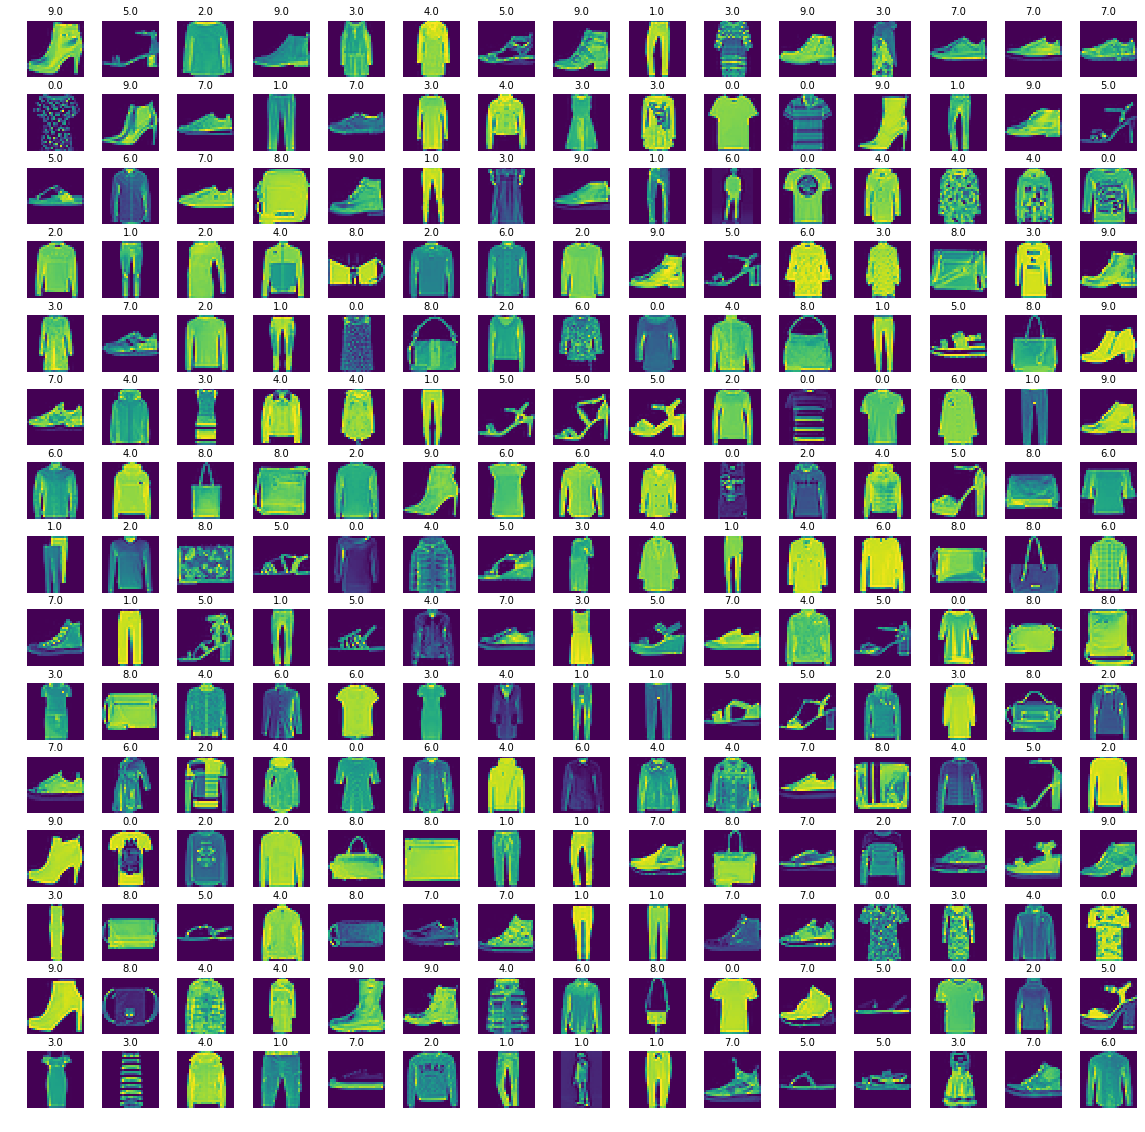

In [31]:

# Define the dimention of the plot grid
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(l_grid, w_grid , figsize = (20,20))

axes=axes.ravel() # flatern the 15 x 15 matrix into 255 array

n_training = len(training) # get the lenght of the training dataset 

#select a random number from 0 to n_training
for i in np.arange(0, w_grid*l_grid) : # create evenly space variables
    
    # Select a random number 
    index = np.random.randint(0, n_training)
    # read and display the image with the selected index
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize=10)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.3)




# DATA PARTITION

In [32]:
X_train = training[:,1:]/255 #to normalize the data

y_train = training[:,0]

X_test = testing[:,1:]/255

y_test = testing[:, 0]

In [33]:
from sklearn.model_selection import train_test_split

X_train , X_validate , y_train , y_validate = train_test_split(X_train , y_train, test_size=0.2, random_state=1234)

Take training , testing and validation data and put them in a form that we can actually feed to our deep network.

We have all our data in an array format and kind of matrix format. Now we need to reshape our data to be in a form of twenty eight by twenty eight by one.

Because that's the form that our convolutional neural network was going to accepting the data.

In [34]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))
                                     

In [35]:
X_train.shape

(48000, 28, 28, 1)

Total we have 48000 samples and each one of them is 28 x 28 x 1 greyscale image

In [36]:
X_test.shape

(10000, 28, 28, 1)

In [37]:
X_validate.shape

(12000, 28, 28, 1)

In [38]:
# import open source nn libraries

import keras 

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [39]:
cnn_model = Sequential()


In [40]:
#32 kernals of 3 x 3 size and 
#the inpute image is 28 x 28 x1, and the activation function is Rectifire 

cnn_model.add(Conv2D(32,3,3, input_shape = (28,28,1), activation = 'relu')) 


#64 kernal of 3 x 3 size

# cnn_model.add(Conv2D(64,3,3, input_shape = (28,28,1), activation = 'relu')) 

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  


In [41]:
# add max pooling layer of 2 x 2 size
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [42]:
# Flattern the model , 
cnn_model.add(Flatten())

thats just too flat out features into one single array so it can actually feed it to fully
dense fully connected neural netwrok.

In [43]:
# Add dense function
cnn_model.add(Dense(output_dim = 32 ,  activation = 'relu'))

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  


In [44]:
# Add output layer
cnn_model.add(Dense(output_dim = 10 ,  activation = 'sigmoid'))

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


# Trainning the model

In [46]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy'])

we use categoral crossentropy because we are simply categorizing our data set out of 10 samples simply. 
ints not like a binary cross entopy we can use but if we have only 0 an 1

In [47]:
epochs = 50

Epochs means how many times we are going to presenting our data set and updating the weights as we go.

# Apply a fit method to our cnn model

In [50]:
cnn_model.fit( X_train,
               y_train,
               batch_size = 512,
               nb_epoch = epochs,
               verbose =1,
               validation_data =(X_validate, y_validate))

Instructions for updating:
Use tf.cast instead.


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 22s 450us/step - loss: 0.9366 - acc: 0.6286 - val_loss: 0.5147 - val_acc: 0.8203
Epoch 2/50
48000/48000 [==============================] - 26s 543us/step - loss: 0.4763 - acc: 0.8336 - val_loss: 0.4459 - val_acc: 0.8411
Epoch 3/50
48000/48000 [==============================] - 27s 563us/step - loss: 0.4231 - acc: 0.8520 - val_loss: 0.4054 - val_acc: 0.8592
Epoch 4/50
48000/48000 [==============================] - 26s 549us/step - loss: 0.3926 - acc: 0.8643 - val_loss: 0.3832 - val_acc: 0.8672
Epoch 5/50
48000/48000 [==============================] - 21s 447us/step - loss: 0.3731 - acc: 0.8704 - val_loss: 0.3699 - val_acc: 0.8691
Epoch 6/50
48000/48000 [==============================] - 19s 387us/step - loss: 0.3486 - acc: 0.8794 - val_loss: 0.3495 - val_acc: 0.8768
Epoch 7/50
48000/48000 [==============================] - 18s 380us/step - loss: 0.3422 - acc: 0.8801 - val_loss: 0.

# EVALUATING THE MODEL

In [51]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('TEST ACCURACY : {:.3F}'.format(evaluation[1]))

10000/10000 [==============================] - 2s 169us/step
TEST ACCURACY : 0.911


In [61]:
 predicted_classes = cnn_model.predict_classes(X_test)

In [62]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

These are actual classes and they predicted for the testing dataset 

Print kind of grid that can tell us ok this my image this is my true label and this my predicted label.

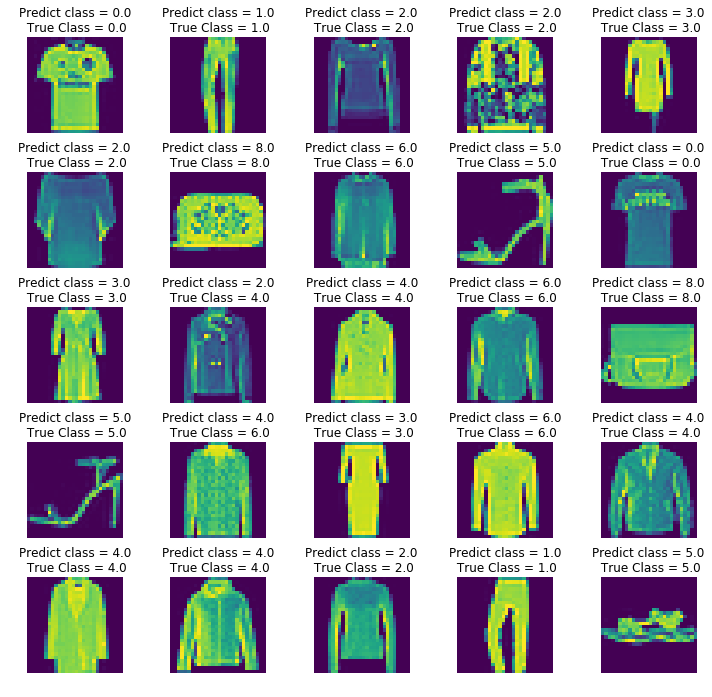

In [71]:
L = 5
w = 5

fig, axes = plt.subplots(L , w , figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0 , L*w) :
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Predict class = {:0.1f}\n True Class = {:0.1f}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

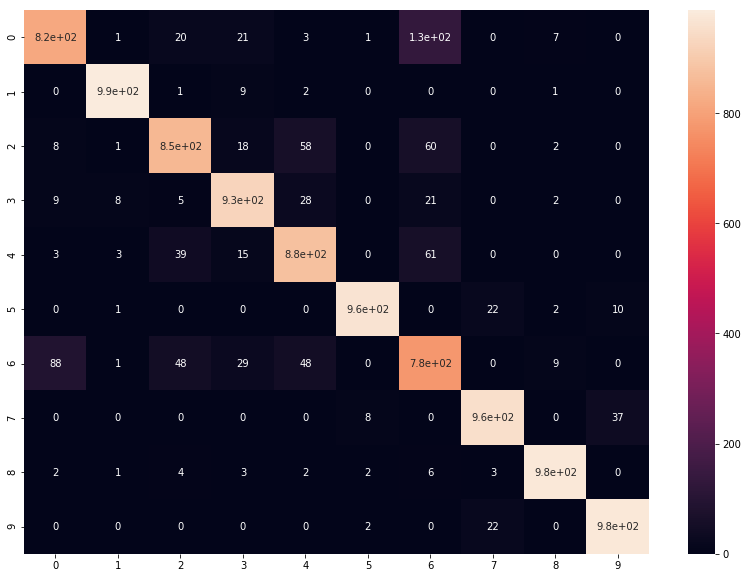

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot=True)

In [76]:
from sklearn.metrics import classification_report
num_classes = 10
target_names={'Class {}'.format(i) for i in range(num_classes)}

print(classification_report(y_test,predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 2       0.88      0.81      0.85      1000
     Class 4       0.98      0.99      0.99      1000
     Class 3       0.88      0.85      0.87      1000
     Class 1       0.91      0.93      0.92      1000
     Class 5       0.86      0.88      0.87      1000
     Class 9       0.99      0.96      0.98      1000
     Class 7       0.74      0.78      0.76      1000
     Class 8       0.95      0.95      0.95      1000
     Class 0       0.98      0.98      0.98      1000
     Class 6       0.95      0.98      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# Improving the model 

Improve accuracy by adding more feature detectors/fillters or adding a dropout


64 kernals of 3 x 3 size 
and the inpute image is 28 x 28 x1, and the activation function is Rectifire 

set kernal = 64 and rerun the above code and check the accuracy


# Conclusion

So first of all we used it 32 kernel and without a drop out and we saw that the accuracy reached 0.9559

However the test accuracy reached 0.911

The next step is we ran a 64 kernel without a dropout.

So we found that the accuracy was during training was 0.9634

However the test accuracy was 0.916.
so the testing accuracy increses little bit.

Essentially essentially we care about the testing values of testing accuracy a lot more than the training.


The next step is we ran 64 kernel with dropout.

So you will find that the model that training has been dropped a little bit over the test accuracy has

been increased to 0.919


 
And as you can see here we have this kind of a prediction class and this is a true class.

So again in summary we saw that pretty much most of them have been classified correctly except this

one with the prediction class was two and the class was six.



OK so what we could do that we can we can take this very simple case study and actually expand it moving

forward to add kind of more advanced features so we can add for instance color textures tile.

We can look at more advanced kind of images.

